In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading CO2 emissions data

file_path = '../../data/processed/clean_co2_emission_log_dataset.csv'
df = pd.read_csv(file_path)
df.sample(7)

,Country,Year,CO2EmissionRate,CO2_Emissions_log
3961,North Macedonia,2010,4.2,0.623249
3727,Iceland,2009,6.4,0.806180
3606,São Tomé and Príncipe,2008,0.5,-0.301030
1867,Suriname,1999,4.7,0.672098
2861,United States,2004,19.3,1.285557
4940,Tunisia,2015,2.7,0.431364
753,Brunei,1994,18.8,1.274158


In [7]:
df['Country'].value_counts()

Macau                               27
Jamaica                             27
Mozambique                          27
Myanmar                             27
Netherlands                         27
                                    ..
Uganda                              20
Somalia                             14
Democratic Republic of the Congo    12
Burundi                              8
Chad                                 2
Name: Country, Length: 199, dtype: int64

This shows that all the countries do not have equal amount of records for all the years.

### Global CO2 Emission Trend

In [107]:
# Trend of CO2 emission from 1990 to 2015 for all countries
trend = df.groupby('Year')['CO2EmissionRate'].sum()
trend

Year
1990     805.1
1991     820.6
1992     964.3
1993     975.5
1994     971.1
1995     969.1
1996     964.2
1997     970.3
1998     961.4
1999     943.8
2000     983.1
2001     971.7
2002     967.0
2003    1002.9
2004    1025.3
2005    1042.1
2006    1041.5
2007    1060.2
2008    1044.2
2009     988.1
2010     962.3
2011     956.4
2012     935.1
2013     919.4
2014     917.0
2015    1026.7
2018    1056.0
Name: CO2EmissionRate, dtype: float64

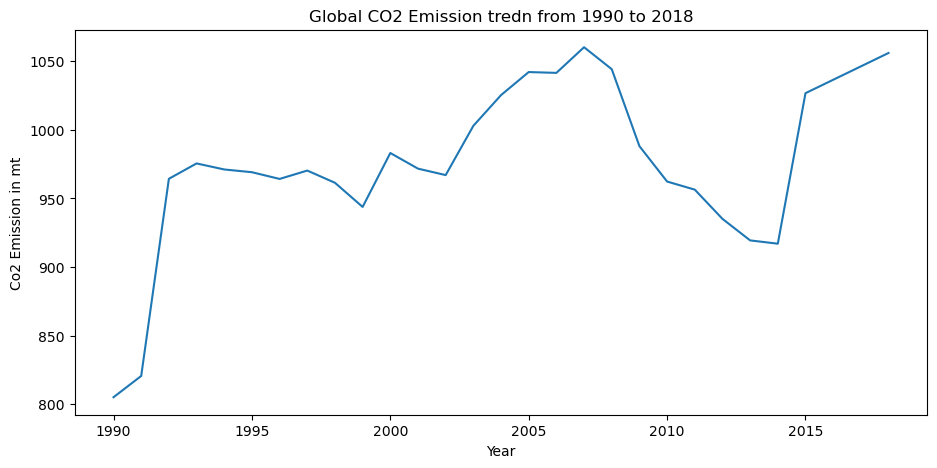

In [157]:
# Line plot to visualize trend
plt.figure(figsize=(11,5))
sns.lineplot(x=trend.index,y=trend.values)
plt.xticks(rotation=0)
plt.title('Global CO2 Emission tredn from 1990 to 2018')
plt.xlabel('Year')
plt.ylabel('Co2 Emission in mt')
plt.show()

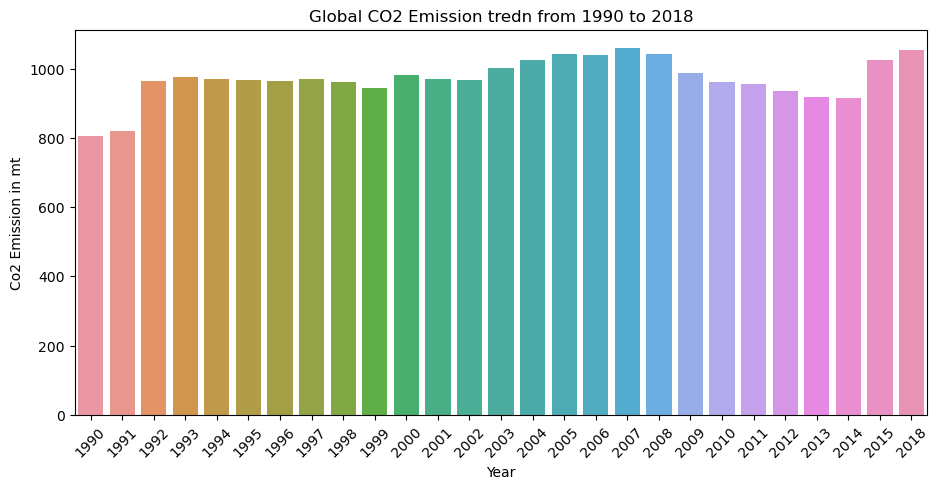

In [156]:
# Bar plot to visualize trend
plt.figure(figsize=(11,5))
sns.barplot(x=trend.index,y=trend.values)
plt.xticks(rotation=45)
plt.title('Global CO2 Emission tredn from 1990 to 2018')
plt.xlabel('Year')
plt.ylabel('Co2 Emission in mt')
plt.show()

### Proportion of co2 Emission by country

In [12]:
#Total Emission from 1990 to 2018 for all countries
total_emission = np.sum(list(df['CO2EmissionRate'])[:-1])
total_emission

26243.6

In [37]:
# Sort by the countries that emit most of the CO2
top_contributors=(df.groupby('Country')['CO2EmissionRate'].sum()).sort_values(ascending=False)
top_contributors

Country
Qatar                               1316.1
Kuwait                               720.8
United Arab Emirates                 709.4
Bahrain                              664.9
Trinidad and Tobago                  644.1
                                     ...  
Uganda                                 2.0
Somalia                                1.4
Democratic Republic of the Congo       1.2
Burundi                                0.8
Chad                                   0.2
Name: CO2EmissionRate, Length: 199, dtype: float64

In [17]:
top_5 = top_contributors.index[:5]
top_5

Index(['Qatar', 'Kuwait', 'United Arab Emirates', 'Bahrain',
       'Trinidad and Tobago'],
      dtype='object', name='Country')

In [18]:
top_5_data = df[(df['Country'].isin(top_5))]
top_5_data

,Country,Year,CO2EmissionRate,CO2_Emissions_log
10,Bahrain,1990,24.1,1.382017
86,Kuwait,1990,19.0,1.278754
125,Qatar,1990,25.2,1.401401
156,Trinidad and Tobago,1990,13.9,1.143015
159,United Arab Emirates,1990,29.4,1.468347
...,...,...,...,...
4969,Bahrain,2018,21.8,1.338456
5052,Kuwait,2018,23.9,1.378398
5098,Qatar,2018,38.2,1.582063
5134,Trinidad and Tobago,2018,26.2,1.418301


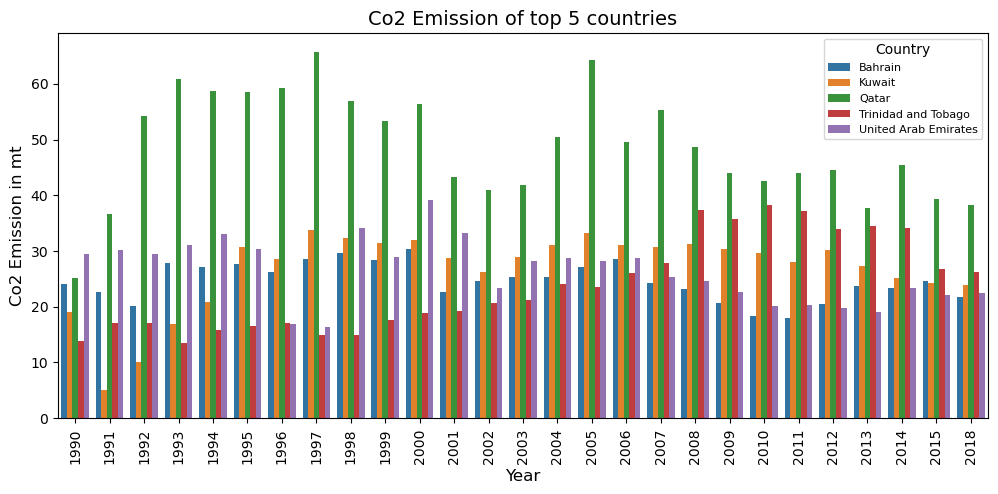

In [154]:
# Bar plot to visualize top 5 contributors
plt.figure(figsize=(12, 5))
sns.barplot(data=top_5_data, x='Year', y='CO2EmissionRate', hue='Country')
plt.xticks(rotation=90)
plt.title('Co2 Emission of top 5 countries', fontsize=14)  # Adjust the font size here
plt.xlabel('Year', fontsize=12)  # Adjust the font size here
plt.ylabel('Co2 Emission in mt', fontsize=12)  # Adjust the font size here
plt.legend(title='Country', title_fontsize='10', fontsize='8')  # Adjust the fontsize as needed

plt.show()

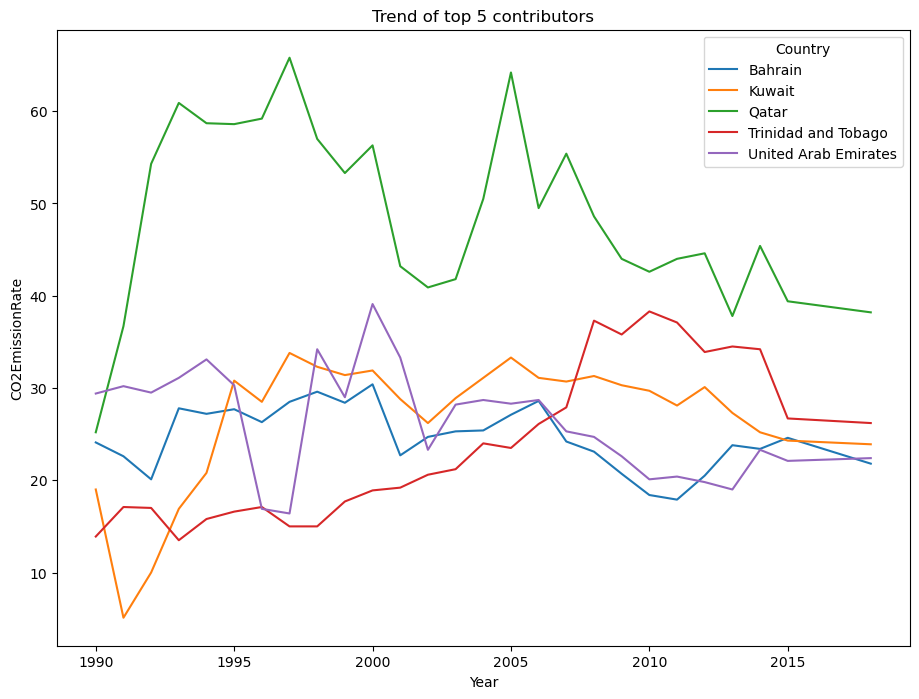

In [153]:
plt.figure(figsize=(11,8))
sns.lineplot(data=top_5_data, x='Year', y='CO2EmissionRate', hue='Country')
plt.title('Trend of top 5 contributors')
plt.xticks(rotation=0)
plt.show()


In [50]:
countries = df.groupby('Country')[['CO2EmissionRate']].sum().reset_index().sort_values(by='CO2EmissionRate',ascending=False)
countries.head()

,Country,CO2EmissionRate
145,Qatar,1316.1
99,Kuwait,720.8
188,United Arab Emirates,709.4
12,Bahrain,664.9
181,Trinidad and Tobago,644.1


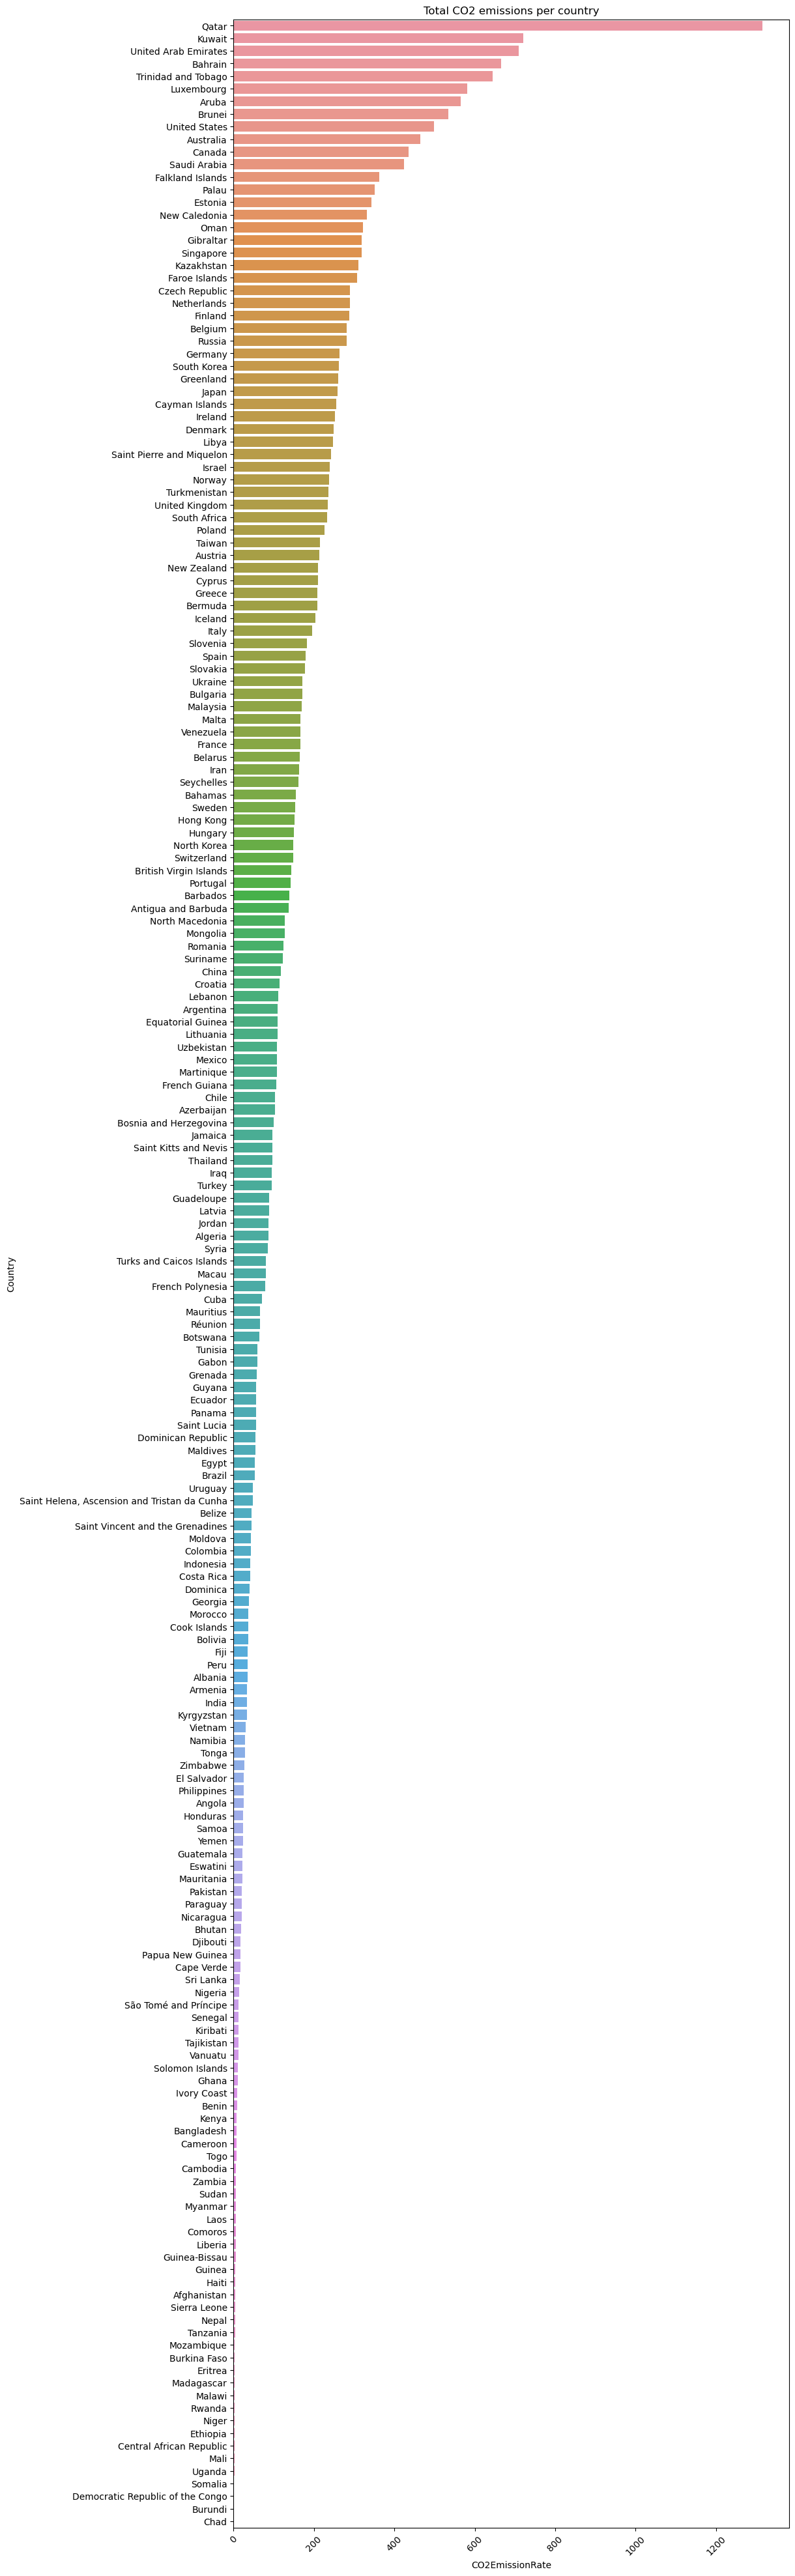

In [51]:
plt.figure(figsize=(11,50))
sns.barplot(data=countries, x='CO2EmissionRate', y='Country')
plt.title('Total CO2 emissions per country')
plt.xticks(rotation=45)
plt.show()

*Summary\
1 - Total CO2 emission is still in an upward trend over the years\
2 - Qatar is highest contributor in CO2 emission\
3 - Qatar, Kuwait, United Arab Emirates, Bahrain, Trinidad and Tobago are the top 5 contributors in descending order*

In [151]:
# Trend for specific country

# Make function to visualize trend of any country
def visualize_country_trend(country=None):
    if country is None:
        print('Please provide a proper country name.')
        return
    country = country.title()
    
    data = df[df['Country'].str.contains(country, case=False)]
    
    if len(data) == 0:
        print('Country name does not match any records.')
        return
    
    country = data['Country'].unique()[0]
    
    plt.figure(figsize=(11, 5))
    sns.lineplot(data=data, x='Year', y='CO2EmissionRate')
    plt.xticks(rotation=0)
    plt.title(f'Global CO2 Emission Trend of {country}')
    plt.xlabel('')
    plt.ylabel('CO2 Emission in mt')
    plt.show()

# Example usage:
# visualize_country_trend('United States')  # Replace 'United States' with the desired country


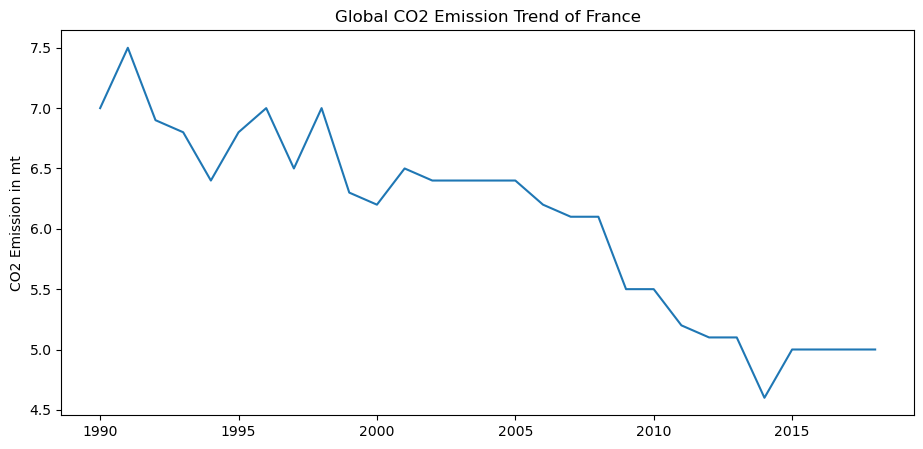

In [152]:
visualize_country_trend('france')

In [143]:
# Trend for specific year

# Function to visualize trend of any country
def visualize_year_trend(year=None):
    try:
        year = int(year)
        if year < 1991 or year > 2018:
            print('Please enter a year between 1991 and 2018.')
            return
        data = df[df['Year'] == year]
        data = data.sort_values(by='CO2EmissionRate', ascending=False).head(10)
        plt.figure(figsize=(11, 5))
        sns.barplot(data=data, y='Country', x='CO2EmissionRate')
        plt.xticks(rotation=0)
        plt.title(f'Top 10 CO2 Emission Contributors in {year}')
        plt.ylabel('')
        plt.xlabel('CO2 Emission in mt')
        plt.show()
    except ValueError:
        print('Please enter a valid year.')

# Example usage:
# visualize_year_trend(2015)  # Replace 2015 with the desired year

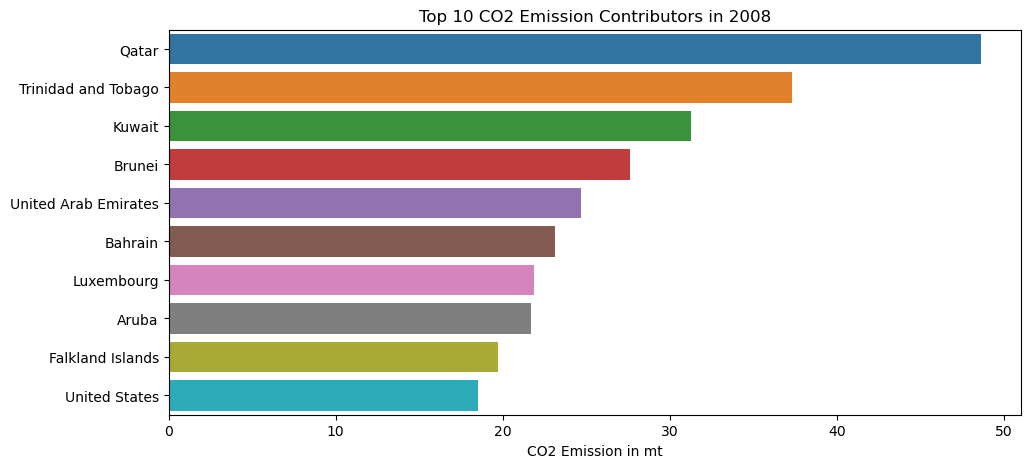

In [144]:
visualize_year_trend(2008)
